In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [85]:
data=pd.read_csv("car data.csv")
    

In [86]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [87]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [88]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [89]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [90]:
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [91]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [92]:
# Encoding Categorical Columns

data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
data['Selling_type']=data['Selling_type'].map({'Dealer':0,'Individual':1})
data['Transmission']=data['Transmission'].map({'Manual':0,'Automatic':1})

<Axes: >

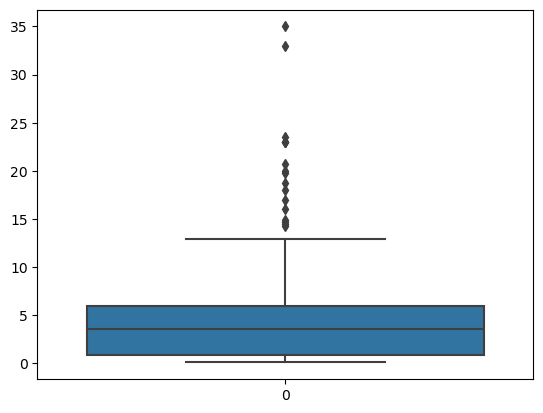

In [93]:
#checking outliers
sns.boxplot(data['Selling_Price'])

In [94]:
#Removing outliers
data = data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [95]:
data.shape

(299, 9)

In [96]:
# Count occurrences of each fuel type
fuel_counts = data['Fuel_Type'].value_counts().sort_index()

In [97]:
# Replace the numeric codes with meaningful names
fuel_counts.index = ['Petrol', 'Diesel', 'CNG']

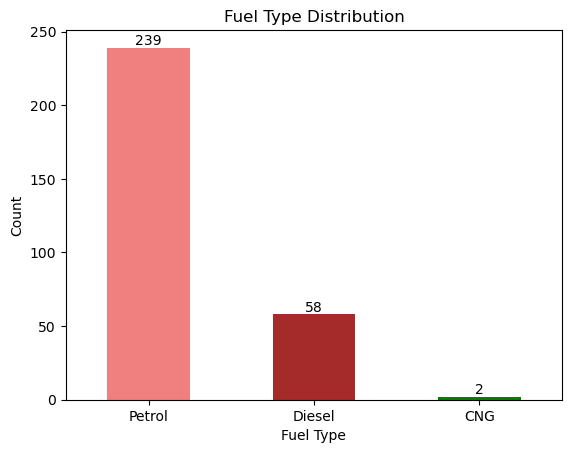

In [98]:
x=fuel_counts.plot(kind='bar', color=['lightcoral', 'brown', 'green'])
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

In [99]:
# Count occurrences of each fuel type
sell_counts = data['Selling_type'].value_counts().sort_index()

In [100]:
# Replace the numeric codes with meaningful names
sell_counts.index = ['Dealer', 'Individual']

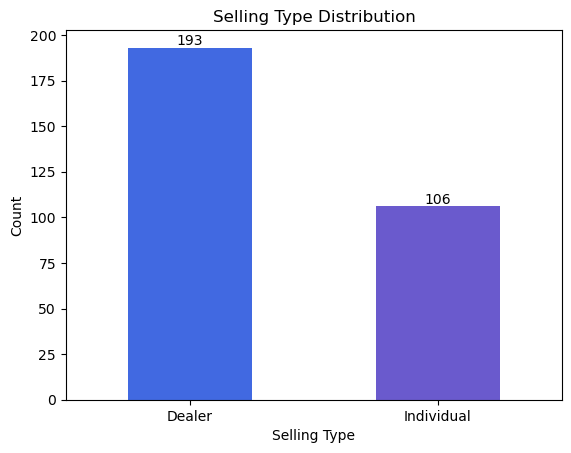

In [101]:
# Plotting for Selling_Type
x=sell_counts.plot(kind='bar', color=['royalblue', 'slateblue'])
plt.title('Selling Type Distribution')
plt.xlabel('Selling Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

In [102]:
# Count occurrences of each transmission type
transmission_counts = data['Transmission'].value_counts().sort_index()
# Replace the numeric codes with meaningful names
transmission_counts.index = ['Manual', 'Automatic']

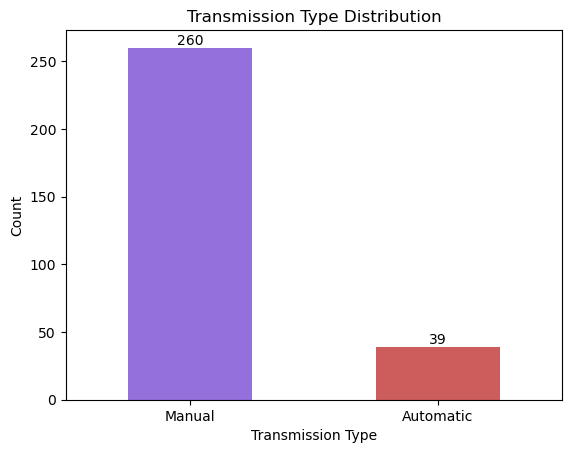

In [103]:
transmission_counts.index = ['Manual', 'Automatic']
# Plotting for Transmission
x=transmission_counts.plot(kind='bar', color=['mediumpurple', 'indianred'])
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

In [104]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [105]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [106]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [107]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [109]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [110]:
training_data_prediction = lin_reg_model.predict(X_train)

In [111]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8774460860583941


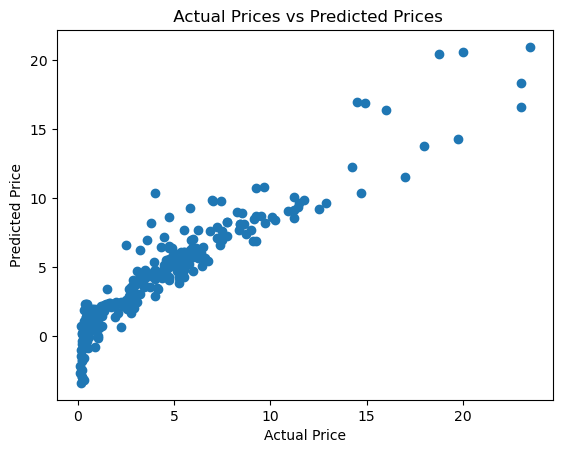

In [112]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [113]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8761513757398429


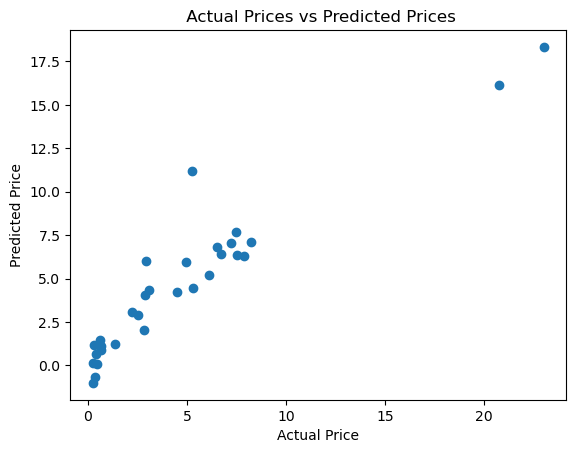

In [114]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()